In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset

In [21]:
df = pd.read_csv(r'C:\Users\sidde\OneDrive\Documents\Dissertation\Final\Data_source\Insurance data.csv')


df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


### EDA


#### Handling missing values



In [22]:
df.isna().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [23]:
# Replace NaN values with 0's for marital_status,witness_present_ind as it has binary values
df['marital_status'].fillna(0, inplace=True)
df['witness_present_ind'].fillna(0, inplace=True)

# Replace NaN values with mean values for claim_est_payout,age_of_vehicle as it has continuous values
df['claim_est_payout'].fillna(df['claim_est_payout'].median(), inplace=True)
df['age_of_vehicle'].fillna(df['age_of_vehicle'].median(), inplace=True)



Handling missing values in a dataset before modeling involves strategies such as imputation or removal to ensure a complete and reliable dataset for accurate model training

#### Cleaning independent/continuous variables

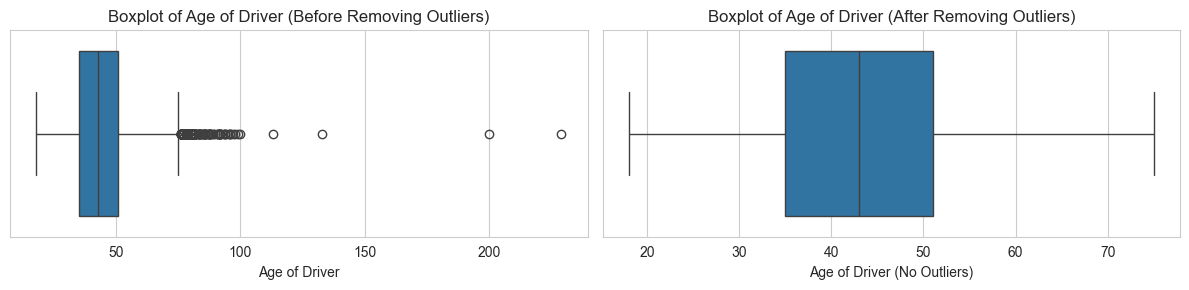

In [24]:

median_age = df['age_of_driver'].median()
# Boxplot before removing outliers
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x='age_of_driver', data=df)
plt.title('Boxplot of Age of Driver (Before Removing Outliers)')
plt.xlabel('Age of Driver')

# Calculate the IQR for 'age_of_driver'
Q1 = df['age_of_driver'].quantile(0.25)
Q3 = df['age_of_driver'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and replace outliers in 'age_of_driver' with the median age
df['age_of_driver_no_outliers'] = np.where((df['age_of_driver'] < lower_bound) | (df['age_of_driver'] > upper_bound),
                                            median_age, df['age_of_driver'])

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='age_of_driver_no_outliers', data=df)
plt.title('Boxplot of Age of Driver (After Removing Outliers)')
plt.xlabel('Age of Driver (No Outliers)')

plt.tight_layout()
plt.show()


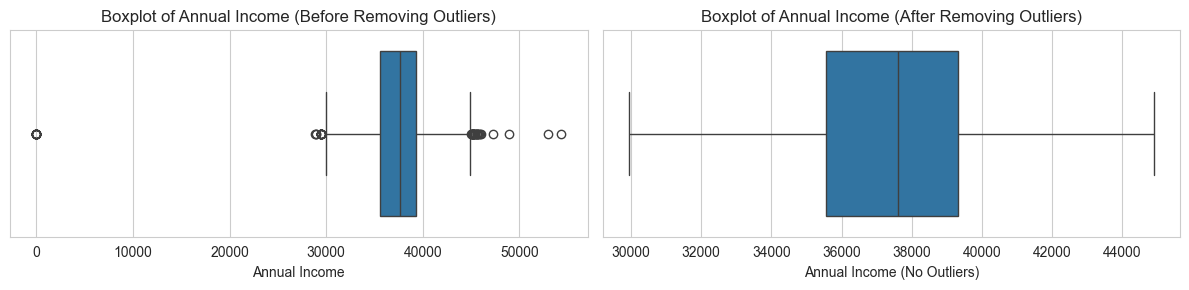

In [25]:
#Handling outliers in Annual Income

median_income = df['annual_income'].median()
# Boxplot before removing outliers
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x='annual_income', data=df)
plt.title('Boxplot of Annual Income (Before Removing Outliers)')
plt.xlabel('Annual Income')

# Calculate the IQR for 'annual_income'
Q1 = df['annual_income'].quantile(0.25)
Q3 = df['annual_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and replace outliers in 'annual_income' with the median income
df['annual_income_no_outliers'] = np.where((df['annual_income'] < lower_bound) | (df['annual_income'] > upper_bound),
                                           median_income, df['annual_income'])

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='annual_income_no_outliers', data=df)
plt.title('Boxplot of Annual Income (After Removing Outliers)')
plt.xlabel('Annual Income (No Outliers)')

plt.tight_layout()
plt.show()

Removing outliers from a dataset before modeling entails the identification and exclusion of data points that deviate significantly from the overall pattern, enhancing model robustness and performance

#### Cleaning target variable

In [26]:
# Checking the target variable
df["fraud"].value_counts()


fraud
 0    15179
 1     2816
-1        3
Name: count, dtype: int64

In [27]:
# Target variable fraud has -1,0,1 values where it can have only 0's and 1's. So dropping the outliers
df = df[df["fraud"] != -1]

Dropping instances with inconsistent or undefined target variable values ensures the integrity and reliability of the dataset for accurate model training

#### Handling temporal values


In [28]:
# Convert the 'Date' column to a datetime object
df['claim_date'] = pd.to_datetime(df['claim_date'])
# Extract the year and create a new 'Year' column
df['Claim_Year'] = df['claim_date'].dt.year

In [29]:
df['claim_date']

0       2016-12-16
1       2015-02-12
2       2016-12-06
3       2016-05-05
4       2015-10-27
           ...    
17993   2015-03-28
17994   2015-01-05
17995   2016-09-10
17996   2015-12-25
17997   2016-09-26
Name: claim_date, Length: 17995, dtype: datetime64[ns]

Handling temporal values is crucial in data analysis and modeling as it enables the extraction of meaningful insights over time, revealing trends, patterns, and seasonality within the data

#### Visualizing the target variable

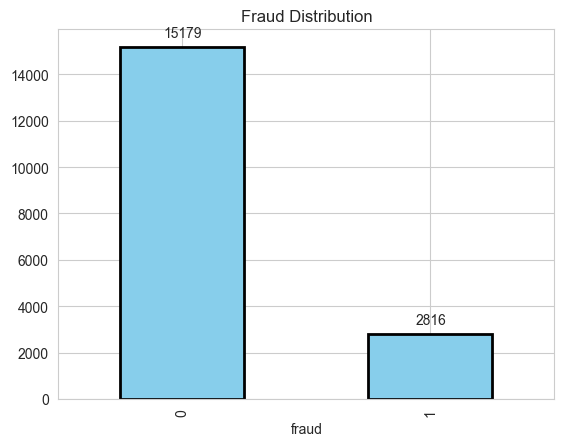

In [30]:
ax = df['fraud'].value_counts().plot.bar(color='skyblue', edgecolor='black', linewidth=2)  # Adjust linewidth
# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.title('Fraud Distribution')  
plt.show()

The bar plot illustrates the distribution of fraud in the overall dataset, visually presenting the count of fraud instances, with data labels enhancing transparency and comprehension

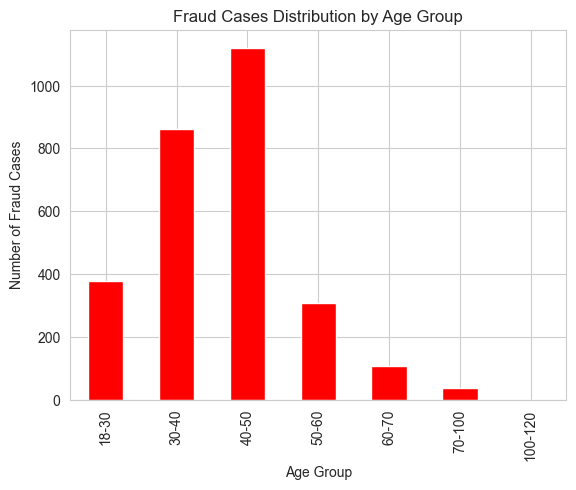

In [31]:
age_bins = [18, 30, 40, 50, 60, 70, 100, 120]  # Define your age bins
df['age_group'] = pd.cut(df['age_of_driver'], bins=age_bins, right=True, labels=[f'{age_bins[i-1]}-{age_bins[i]}' for i in range(1, len(age_bins))])

# Count the number of fraud cases in each age group
fraud_counts = df.groupby('age_group')['fraud'].sum()

# Bar chart
fraud_counts.plot(kind='bar', color='red')
plt.title('Fraud Cases Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraud Cases')

# Display the plot
plt.show()

# Drop the 'age_group' column if you no longer need it
df.drop('age_group', axis=1, inplace=True)

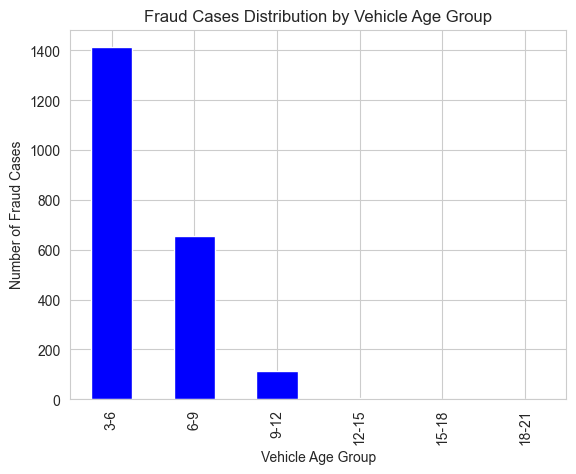

In [32]:
age_bins = [3,6,9,12,15,18,21]  # Define your age bins
df['Vechicle_age_group'] = pd.cut(df['age_of_vehicle'], bins=age_bins, right=True, labels=[f'{age_bins[i-1]}-{age_bins[i]}' for i in range(1, len(age_bins))])

# Count the number of fraud cases in each age group
fraud_counts = df.groupby('Vechicle_age_group')['fraud'].sum()

# Bar chart
fraud_counts.plot(kind='bar', color='blue')
plt.title('Fraud Cases Distribution by Vehicle Age Group')
plt.xlabel('Vehicle Age Group')
plt.ylabel('Number of Fraud Cases')

# Display the plot
plt.show()

# Drop the 'age_group' column if you no longer need it
df.drop('Vechicle_age_group', axis=1, inplace=True)

#### Visualizing insured's discrete/continuous data

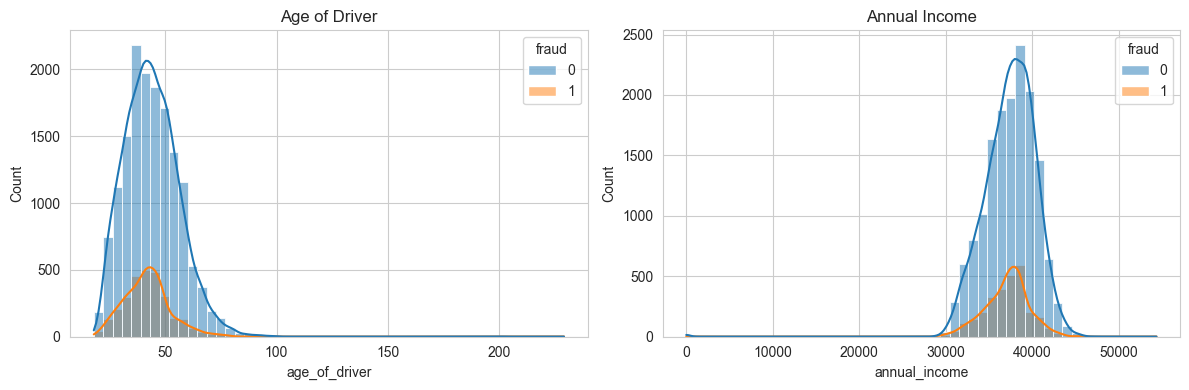

In [33]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot histogram for 'age_of_driver'
sns.histplot(data=df, x='age_of_driver', hue='fraud', bins=50, kde=True, ax=axes[0])
axes[0].set_title('Age of Driver')

# Plot histogram for 'annual_income'
sns.histplot(data=df, x='annual_income', hue='fraud', bins=50, kde=True, ax=axes[1])
axes[1].set_title('Annual Income')

# Adjust layout
plt.tight_layout()
plt.show()

Checking for normal distribution is important in statistical analysis and modeling as it ensures the validity of assumptions, aids in selecting appropriate statistical tests, and enhances the reliability of results and predictions

#### Visualizing insured's categorical data

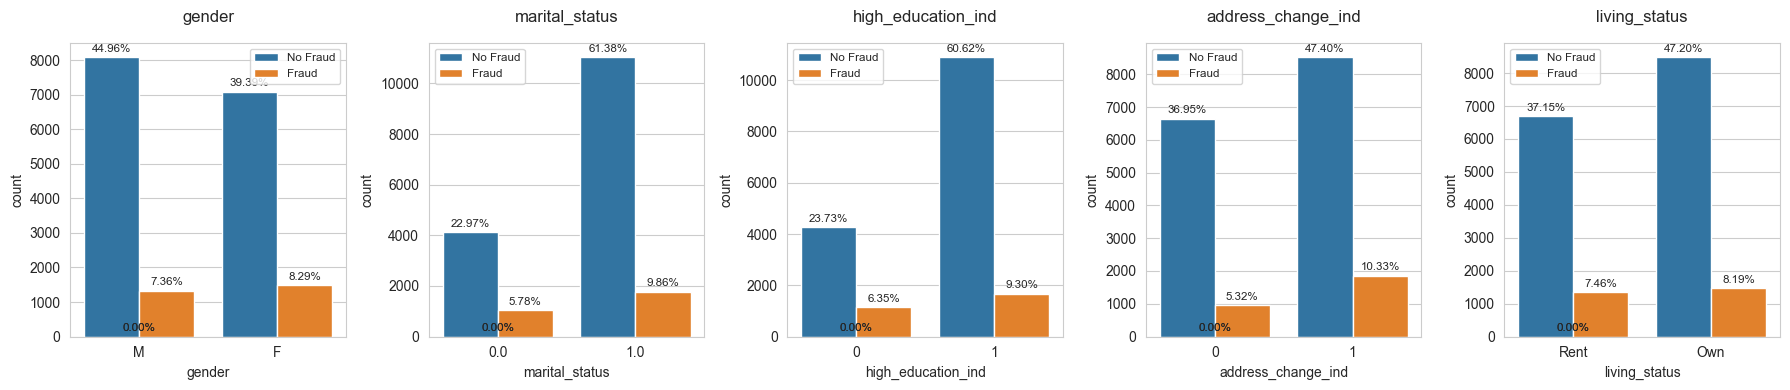

In [34]:
columns_of_interest = ["gender", "marital_status", "high_education_ind", "address_change_ind", "living_status"]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(18, 4))

for i, col in enumerate(columns_of_interest):
    sns.set_style('whitegrid')
    
    # Create count plot with legend, reduced legend size, and custom labels
    ax = sns.countplot(x=col, hue='fraud', data=df, ax=axes[i], legend=True)
    ax.legend(labels=['No Fraud', 'Fraud'], fontsize='small')  # Adjust the legend size and set custom labels
    
    # Add percentage data labels to the bars
    total = len(df[col])
    for p in ax.patches:
        percentage = f'{p.get_height() / total * 100:.2f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize='small')

    axes[i].set_title(col, pad=15)  # Increase the space between title and chart
    
# Adjust layout
plt.tight_layout()
plt.show()


Displaying the distribution of fraud across categorical features such as 'gender,' 'marital status,' 'education level,' 'address change history,' and 'living status' provides insights into potential patterns and variations, contributing to a comprehensive understanding of the impact of these factors on fraudulent activities within the dataset

#### Year vs Claims

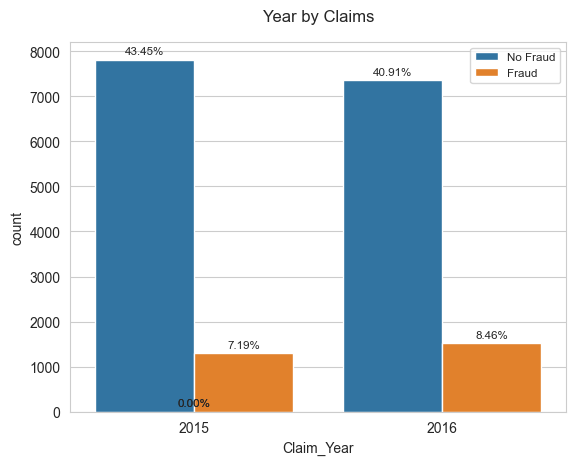

In [35]:
sns.set_style('whitegrid')



# Create count plot with custom palette and legend
ax = sns.countplot(x='Claim_Year', hue='fraud', data=df)

# Add percentage data labels to the bars
total = len(df['Claim_Year'])
for p in ax.patches:
    percentage = f'{p.get_height() / total * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize='small')

# Adjust legend size and set custom labels
ax.legend(labels=['No Fraud', 'Fraud'], fontsize='small')

# Display the count plot
plt.title('Year by Claims', pad=15)  # Increase the space between title and chart
plt.show()

The analysis of claims over the years is important for understanding temporal trends and patterns, providing valuable insights into the evolving nature of claims and facilitating informed decision-making in risk management and insurance strategies

In 2016, the fraud count seemed to be increased in count compared to 2015

#### Accident site vs Claims

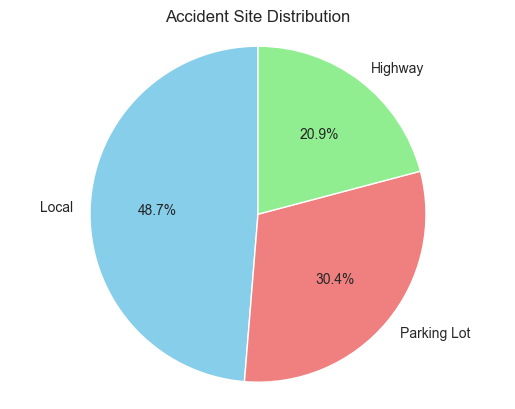

In [36]:
site_counts = df['accident_site'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(site_counts, labels=site_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])

# Add data labels to the wedges
for i, (label, count) in enumerate(zip(site_counts.index, site_counts)):
    angle = sum(site_counts[:i]) + count / 2
    x = 0.5 * (1.2 * (angle > 180) - 1)
    y = 1.2 * angle % 180
    ax.annotate(f'{count}', (x, y), xytext=(1.35 * x, 1.35 * y), ha='center', va='center')

# Set aspect ratio to be equal, ensuring the pie chart is circular
ax.axis('equal')

# Display the pie chart
plt.title('Accident Site Distribution')
plt.show()

The distribution of accident sites is important for understanding the prevalence of fraudulent cases, providing insights into patterns or vulnerabilities associated with specific areas

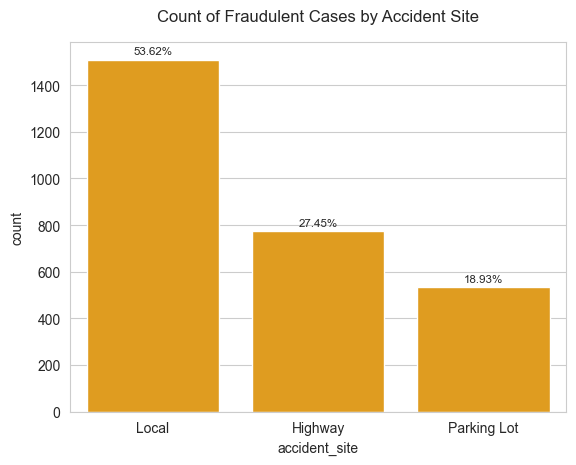

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

sns.set_style('whitegrid')

# Filter the DataFrame to include only rows where fraud is 1 (assuming fraud is binary)
fraud_data = df[df['fraud'] == 1]

# Create a count plot for 'accident_site' with the filtered fraud data and orange color
ax = sns.countplot(x='accident_site', data=fraud_data, color='orange')

# Set a title for the plot
ax.set_title('Count of Fraudulent Cases by Accident Site', pad=15)  # Increase the space between title and chart

# Add percentage data labels on top of each bar
total = len(fraud_data)
for p in ax.patches:
    percentage = f'{p.get_height() / total * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize='small')

# Show the plot
plt.show()


LOCAL accident site exhibits both the highest number of claims and the highest reported instances of fraud, highlighting a potential correlation between claim frequency and fraudulent activities in this specific location

#### Fraudulent Cases by Channel

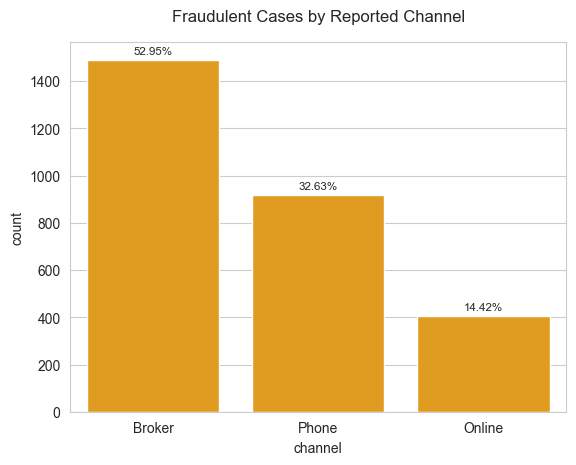

In [40]:
sns.set_style('whitegrid')

# Filter the DataFrame to include only rows where fraud is 1 (assuming fraud is binary)
fraud_data = df[df['fraud'] == 1]

# Create a count plot for 'channel' with the filtered fraud data and orange color
ax = sns.countplot(x='channel', data=fraud_data, color='orange')

# Set a title for the plot
ax.set_title('Fraudulent Cases by Reported Channel', pad=15)  # Increase the space between title and chart

# Add percentage data labels on top of each bar
total = len(fraud_data)
for p in ax.patches:
    percentage = f'{p.get_height() / total * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize='small')

# Show the plot
plt.show()

The channel 'broker' records the highest incidence of reported fraud cases

#### Claim Estimation Payout for Fraud and Non-Fraud Cases 


C:\Users\sidde\AppData\Local\Temp\ipykernel_10668\3444364751.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage_payouts.index, y=percentage_payouts.values, palette=['skyblue', 'orange'])


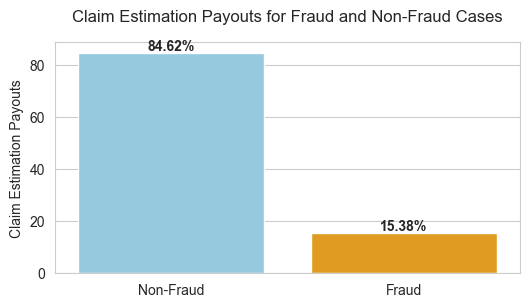

In [50]:
sns.set_style('whitegrid')

# Calculate the sum of claim_est_payout for Fraud and Non-Fraud cases
fraud_sum = df[df['fraud'] == 1]['claim_est_payout'].sum()
non_fraud_sum = df[df['fraud'] == 0]['claim_est_payout'].sum()

total_sum = fraud_sum + non_fraud_sum

fraud_percentage = (fraud_sum / total_sum) * 100
non_fraud_percentage = (non_fraud_sum / total_sum) * 100

percentage_payouts = pd.Series([non_fraud_percentage, fraud_percentage], index=['Non-Fraud', 'Fraud'])

# Create a bar plot with custom color for 'fraud'
plt.figure(figsize=(6, 3))
ax = sns.barplot(x=percentage_payouts.index, y=percentage_payouts.values, palette=['skyblue', 'orange'])

# Adding percentage data labels
for i, percentage_value in enumerate(percentage_payouts.values):
    ax.text(i, percentage_value, f'{percentage_value:.2f}%', ha='center', va='bottom', fontdict={'weight': 'bold'})

# Set labels and title
ax.set_xlabel('')
ax.set_ylabel('Claim Estimation Payouts')
ax.set_title('Claim Estimation Payouts for Fraud and Non-Fraud Cases', pad=15)  # Increase the space between title and chart

plt.show()

Out of the total claim estimation payouts, 15.38% was paid for fraud cases

#### Living status vs Claim Est Payout

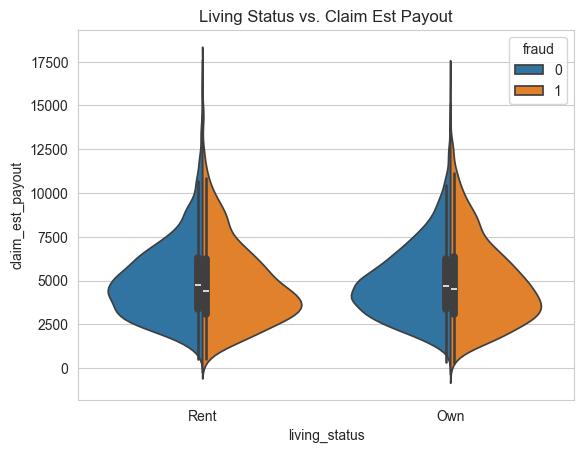

In [53]:
# Violin plot for 'living_status' and 'claim_est_payout'
sns.violinplot(x='living_status', y='claim_est_payout', hue='fraud', data=df, split=True)
plt.title('Living Status vs. Claim Est Payout')
plt.show()

While the overall distribution of claim estimation payouts for living statuses 'Own' and 'Rent' appears relatively equal, there is a slight tendency towards higher claim estimation payouts for fraud cases associated with the 'Rent' living status, suggesting a potential difference in the payout patterns between the two categories

In [ ]:

# Relationship between 'annual_income' and 'claim_est_payout'
sns.scatterplot(x='annual_income', y='claim_est_payout', hue='fraud', data=df)
plt.title('Annual Income vs. Claim Est Payout')
plt.show()



### Feature Engineering

In [ ]:
#Zip code & claim_date is dropped as its not useful for classification
df = df.drop('claim_date', axis=1)
#Instead of claim_date, Claim_Year will be suitable.
df = df.drop('zip_code', axis=1)

df = df.drop('claim_number', axis=1)
#Claim Number is a unique column, hence removed.

#### Numerical Variables

In [ ]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [ ]:
numerical_features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Extract numerical columns (you might need to adapt this based on your DataFrame structure)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max scaling to the numerical columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#### Categorical Variables

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

for feature in categorical_features[:]:
    print(feature,":",len(df[feature].unique()),'labels')

The Vehicle_color has more than 3 labels. Hence,
Frequency encoding : vehicle_color , 
One hot encoding : gender,living_status,accident_site,channel,vehicle_category,
Ordinal Number Encoding : claim_day_of_week

###### Ordinal Number Encoding

In [ ]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

#Encodes all the day names to assigned numbers
df['claim_day_of_week']=df['claim_day_of_week'].map(dictionary)


######  Frequency Encoding

In [ ]:
Map = df['vehicle_color'].value_counts().to_dict()

#Mapping the respective value counts to the colors
df['vehicle_color']=df['vehicle_color'].map(Map)


######  One Hot Encoding

In [ ]:
# Create dummy columns
accident_site_dummies = pd.get_dummies(df['accident_site'], drop_first=True)
channel_dummies = pd.get_dummies(df['channel'], drop_first=True)
vehicle_category_dummies = pd.get_dummies(df['vehicle_category'], drop_first=True)

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, accident_site_dummies], axis=1)
df = pd.concat([df, channel_dummies], axis=1)
df = pd.concat([df, vehicle_category_dummies], axis=1)

# Drop the original 'accident_site' column
df = df.drop('accident_site', axis=1)
df = df.drop('channel', axis=1)
df = df.drop('vehicle_category', axis=1)

######  Binary Encoding

In [ ]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['living_status'] = df['living_status'].map({'Rent': 1, 'Own': 0})


#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split



# Assuming 'fraud' is the target variable, and the rest are features
X = df.drop('fraud', axis=1)
y = df['fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape) 
print("Testing set shape:", X_test.shape, y_test.shape)



### Data Modelling

In [ ]:
#!pip install xgboost
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


In [ ]:
# Handling the imbalanced dataset using smote tomek technique
from imblearn.combine import SMOTETomek
from collections import Counter

# Assuming X_train and y_train are your training data
smote_tomek = SMOTETomek(sampling_strategy=0.75)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print("The number of classes before fit: {}".format(Counter(y_train)))
print("The number of classes after fit: {}".format(Counter(y_train_resampled)))


In [ ]:
# Oversample
rf_pipeline = Pipeline([
     
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline
rf_pipeline.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_pipeline.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Create a pipeline with imputation and XGBClassifier
xgb_pipeline = Pipeline([

    ('classifier', XGBClassifier(random_state=42))
])

# Fit the pipeline
xgb_pipeline.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with imputation and AdaBoostClassifier
adaboost_pipeline = Pipeline([
    ('classifier', AdaBoostClassifier(
        n_estimators=50,
        learning_rate=0.1,
        base_estimator=DecisionTreeClassifier(max_depth=1),
        algorithm='SAMME.R',
        random_state=42
    ))
])

# Fit the pipeline
adaboost_pipeline.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_adaboost = adaboost_pipeline.predict(X_test)

# Evaluate
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.4f}")

print("\nAdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

print("\nAdaBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adaboost))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with imputation and AdaBoostClassifier
adaboost_pipeline = Pipeline([
    ('classifier', AdaBoostClassifier(
        n_estimators=100,
        learning_rate=0.15,
        base_estimator=DecisionTreeClassifier(max_depth=1),
        algorithm='SAMME.R',
        random_state=42
    ))
])

# Fit the pipeline
adaboost_pipeline.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_adaboost = adaboost_pipeline.predict(X_test)

# Evaluate
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.4f}")

print("\nAdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

print("\nAdaBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adaboost))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with imputation and AdaBoostClassifier
adaboost_pipeline = Pipeline([
    ('classifier', AdaBoostClassifier(
        n_estimators=98,
        learning_rate=0.4,
        algorithm='SAMME.R',
        random_state=42
    ))
])

# Perform cross-validation
cv_scores = cross_val_score(adaboost_pipeline, X_train_resampled, y_train_resampled, cv=2, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit the pipeline on the entire training set
adaboost_pipeline.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred_adaboost = adaboost_pipeline.predict(X_test)

# Evaluate on the test set
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"\nAdaBoost Accuracy on Test Set: {accuracy_adaboost:.4f}")

print("\nAdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

print("\nAdaBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adaboost))

##### Focusing on reducing false positives. Non fraud shouldn't be labeled as fraud which is the first priority, rather than fraud being labelled as non fraud

In [ ]:
[[3985  603]
 [ 517  294]]  lr 0.17  es 95

In [ ]:
[[3973  615]
 [ 518  293]]
      n_estimators=100,
        learning_rate=0.4,
        algorithm='SAMME',